The dataset contains the following columns:

N : Ratio of Nitrogen content in soil

P : Ratio of Phosphorous content in soil

K : Ratio of Potassium content in soil

temperature : Average temperature in Celsius

humidity : Average relative humidity

ph : pH value of the soil

rainfall : Average rainfall in mm

label : The label column contains the name of the recommended crop for the given combination of soil and climatic parameters.

In [116]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [117]:
df = pd.read_csv(r"C:\Users\harsh\Downloads\Crop_recommendation.csv")

In [118]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [119]:
df.size #size of the dataset

17600

The size of the dataset is 17600

In [120]:
df.shape #checking no. of rows & no. of columns

(2200, 8)

The shape of the dataset is 2200 rows and 8 columns

In [121]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [123]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no misssing values

In [124]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Above code shows us that in 'label' columns, these are the different types of crops

In [125]:
df['label'].nunique()

22

It shows that there are 22 different types of crops present in 'label' column

In [126]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

It shows the number of , each different types of crop in 'label' columns.
Eg:- Number of times, rice in present in 'label' column is 100

In [127]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

It shows the datatypes of each column

Everything looks fine 

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


The df.describe().T method is used to generate a statistical summary of a dataset. 

df.describe().T will return a table that shows the following statistics for each column:

count: the number of non-missing values in the column

mean: the arithmetic mean of the values in the column

std: the standard deviation of the values in the column

min: the minimum value in the column

25%: the 25th percentile of the values in the column

50%: the median or 50th percentile of the values in the column

75%: the 75th percentile of the values in the column

max: the maximum value in the column

## Checking For Outliers

In [129]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
N,2200.0,50.551818,36.917334,0.000000,0.000000,1.000000,2.000000,3.000000,4.000000,21.000000,37.000000,84.250000,107.000000,116.000000,117.000000,119.000000,120.000000,129.010000,140.000000
P,2200.0,53.362727,32.985883,5.000000,5.990000,6.000000,7.000000,8.000000,10.000000,28.000000,51.000000,68.000000,89.100000,133.000000,136.000000,139.000000,140.020000,143.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,7.990000,9.000000,11.970000,14.000000,15.000000,20.000000,32.000000,49.000000,83.100000,199.000000,201.000000,202.000000,203.000000,204.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,11.827382,15.433360,16.787545,17.433494,17.915085,22.769375,25.598693,28.561654,31.330131,34.056636,34.873278,35.832756,38.063809,40.791352,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,15.225297,16.419490,17.637857,18.713107,19.374917,60.261953,80.473146,89.948771,93.065588,94.368844,94.589080,94.794695,95.212759,96.966445,99.981876
ph,2200.0,6.469480,0.773938,3.504752,4.603202,4.760027,5.014436,5.261016,5.435112,5.971693,6.425045,6.923643,7.425390,7.748417,7.825626,7.976616,8.184598,8.736512,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,21.903847,24.199189,26.306835,28.678107,33.823512,64.551686,94.867624,124.267508,187.947933,209.542438,218.539872,231.388246,243.544823,267.991472,298.560117


This code will generate a statistical summary of the dataset stored in the DataFrame df, 
including additional percentiles for each column. 

The '.T' method transposes the summary table so that the variables are listed in rows rather than columns.

The percentiles argument is used to specify the list of percentiles that should be included in the summary table. 

In this case, the list includes the 1st, 2nd, 3rd, 4th, 5th, 25th, 50th (median), 75th, 90th, 95th, 96th, 97th, 98th, and 99th percentiles.

There are no outliers present in dataset

<AxesSubplot:>

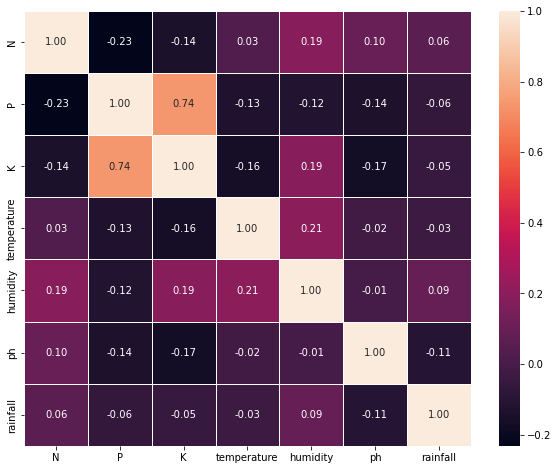

In [130]:
fig, ax = plt.subplots(figsize=(10, 8))  
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax)

This line of code creates a heatmap plot using the Seaborn library in Python. 
The plot visualizes the correlation matrix of the dataframe df, 
which represents the pairwise correlation between all the columns in the dataframe.

The fig, ax = plt.subplots(figsize=(10, 8)) code initializes a new figure object and returns two variables: 
fig, which represents the overall figure, and 
ax, which represents the subplot within the figure. 
The figsize parameter sets the size of the figure to be 10 inches by 8 inches.

The sns.heatmap() function creates the heatmap plot. 
The df.corr() parameter specifies the dataframe to use for computing the correlation matrix. 
The annot=True parameter adds numeric annotations to the cells of the heatmap. 
The fmt=".2f" parameter specifies that the annotations should be formatted to two decimal places. 
The linewidths=.5 parameter sets the width of the lines separating the cells of the heatmap to be 0.5. 
The ax=ax parameter specifies that the plot should be created on the previously defined subplot within the figure.

## Seperating features and target label

In [135]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [136]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [137]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

This code snippet is using the train_test_split() function from the sklearn.model_selection module to split the dataset into training and testing sets.

The function takes four arguments:

features: a DataFrame or array-like object containing the feature data (i.e., the independent variables).

target: a Series or array-like object containing the target data (i.e., the dependent variable).

test_size: the proportion of the data to use for testing, expressed as a decimal between 0 and 1.

random_state: a seed value for the random number generator, which ensures that the data is split in the same way each time the function is called with the same arguments.

If the random_state parameter is set to a fixed value, such as random_state = 2, the function will generate the same random split of the data each time it is called with the same arguments.

In other words, setting random_state = 2 ensures that the data is split in the same way each time you run the code, which is useful for reproducibility and consistency in your analysis.

It is usually recommended to use a specific value for random_state so that the results can be reproduced in the future. If you set random_state to None, the function will generate a random split of the data each time it is called.

The function returns four arrays:

Xtrain: the feature data for the training set.

Xtest: the feature data for the testing set.

Ytrain: the target data for the training set.

Ytest: the target data for the testing set.



# Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=3,max_depth=6)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)
print('================================================')


print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  95.9090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.80      1.00      0.89        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.95      0.83      0.88        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.67      0.74      0.70        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

from sklearn.tree import DecisionTreeClassifier

This line imports the DecisionTreeClassifier class from the sklearn.tree module.

-------------------------------------------------------------------------------------------------

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=3,max_depth=6)

This line creates a DecisionTreeClassifier object with the specified hyperparameters, which are:

criterion="entropy": This specifies that the entropy criterion should be used to measure the quality of a split.

random_state=3: This sets the random seed for reproducibility.

max_depth=6: This specifies the maximum depth of the decision tree.

-----------------------------------------------------------------------------------------------------

DecisionTree.fit(Xtrain,Ytrain)

This line fits the decision tree classifier to the training data.

---------------------------------------------------------------------------------------------------

predicted_values = DecisionTree.predict(Xtest)

This line uses the trained decision tree classifier to predict the labels for the test data.

-----------------------------------------------------------------------------------------------------

x = metrics.accuracy_score(Ytest, predicted_values)

This line computes the accuracy of the predicted labels compared to the true labels.

---------------------------------------------------------------------------------------------------

acc.append(x)

This line appends the accuracy score to the acc list.

------------------------------------------------------------------------------------------------

model.append('Decision Tree')

This line appends the name of the model to the model list.

---------------------------------------------------------------------------------------------

print("DecisionTrees's Accuracy is: ", x*100)

This line prints the accuracy of the decision tree classifier on the test data.

---------------------------------------------------------------------------------------------


print(classification_report(Ytest,predicted_values))

This line prints a classification report that includes precision, recall, F1-score, and support for each class in the predicted labels compared to the true labels.





In [139]:
from sklearn.model_selection import cross_val_score

In [140]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In this code, the cross_val_score function is used to perform cross-validation on a decision tree classifier model (DecisionTree). 

The feature and target data are passed as arguments, along with the cv argument which specifies the number of folds to use for cross-validation (in this case, 5).

The cross_val_score function returns an array of scores, one for each fold of the cross-validation process. These scores can be used to evaluate the performance of the model and compare it to other models.

In [141]:
score

array([0.98863636, 0.96590909, 0.98181818, 0.95909091, 0.96818182])

# Guassian Naive Bayes

In [142]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)
print('================================================')

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

from sklearn.naive_bayes import GaussianNB

This imports the GaussianNB class from the sklearn.naive_bayes module. This class represents a Naive Bayes classifier.

-----------------------------------------------------

NaiveBayes = GaussianNB()

This creates a new instance of the GaussianNB class and assigns it to the variable NaiveBayes. This object will be used to train the Naive Bayes classifier on the training data and make predictions on the test data.

------------------------------------------------------

NaiveBayes.fit(Xtrain,Ytrain)

This method fits the Naive Bayes classifier to the training data Xtrain and Ytrain. 

------------------------------------------------------

predicted_values = NaiveBayes.predict(Xtest)

This method uses the trained Naive Bayes classifier to make predictions on the test data Xtest. The predicted labels are stored in the predicted_values variable.

-------------------------------------------------------

x = metrics.accuracy_score(Ytest, predicted_values)

This line uses the accuracy_score function from the metrics module to compute the accuracy of the predicted labels (predicted_values) compared to the true labels (Ytest). The accuracy is a measure of the proportion of correctly classified samples.

------------------------------------------------------

acc.append(x)

model.append('Naive Bayes')

These lines append the accuracy (x) and the name of the model ('Naive Bayes') to the acc and model lists, respectively.

------------------------------------------------------

print("Naive Bayes's Accuracy is: ", x)

These lines print the accuracy of the Naive Bayes classifier on the test data (x).

-----------------------------------------------------

print(classification_report(Ytest,predicted_values))

This line uses the classification_report function from the sklearn.metrics module to print a summary of the performance of the Naive Bayes classifier on the test data. This includes the precision, recall, F1-score, and support for each class, as well as the overall accuracy.

In [143]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

The cross_val_score function from the sklearn.model_selection module is used to perform cross-validation on the Naive Bayes classifier. 

This function takes as input the classifier (NaiveBayes), the features (features), the target variable (target), and the number of folds (cv=5).

The function returns an array of scores, where each score is the accuracy of the classifier on a different fold of the data. 

By default, the scoring metric used is the accuracy_score.

So, the score variable contains an array of cross-validation scores for the Naive Bayes classifier.

# Support Vector Machine (SVM)

In [144]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler

These two lines import the SVC class for Support Vector Machines and the MinMaxScaler class for normalization, both from the sklearn package.

--------------------------------------------------------------------------------------------
norm = MinMaxScaler().fit(Xtrain)

X_train_norm = norm.transform(Xtrain)

X_test_norm = norm.transform(Xtest)

These lines create a MinMaxScaler object, norm, and use it to normalize the training and test data. The fit method of MinMaxScaler is used to compute the scaling parameters based on the training data. The transform method is then used to apply these parameters to both the training and test data.

--------------------------------------------------------------------------------------------
SVM = SVC(kernel='poly', degree=3, C=1)

This line creates an SVC object, SVM, with a polynomial kernel of degree 3 and a regularization parameter C of 1. The polynomial kernel can capture non-linear relationships between the features.

--------------------------------------------------------------------------------------------
SVM.fit(X_train_norm,Ytrain)

This line trains the SVC object on the normalized training data (X_train_norm, Ytrain).

--------------------------------------------------------------------------------------------
predicted_values = SVM.predict(X_test_norm)

This line uses the trained SVC object to predict the labels of the normalized test data (X_test_norm).

---------------------------------------------------------------------------------------------
x = metrics.accuracy_score(Ytest, predicted_values)

acc.append(x)

model.append('SVM')

print("SVM's Accuracy is: ", x)

These lines calculate the accuracy of the predicted labels (predicted_values) compared to the true labels of the test data (Ytest). The accuracy is then appended to the acc list and the name of the model ('SVM') is appended to the model list. Finally, the accuracy score is printed.

--------------------------------------------------------------------------------------------
print(classification_report(Ytest,predicted_values))

This line prints a report on the precision, recall, F1 score, and support for each class in the predictions.

In [145]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

This code performs cross-validation on the support vector machine (SVM) model SVM.

cross_val_score() is a function provided by scikit-learn's model_selection module that allows to evaluate a model by cross-validation. It takes the following parameters: the estimator (model object), the data (features), the target variable, and the number of folds for the cross-validation.

In this case, the estimator is the SVM model SVM, and the features and target are features and target respectively. The cv parameter is set to 5, which means that the data will be split into 5 folds and the model will be trained and tested 5 times, with each fold being used as the test set once.

The output of cross_val_score() is an array of scores, with one score for each fold.

# Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)
print('========================================================')

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

from sklearn.linear_model import LogisticRegression

This line imports the LogisticRegression class from the linear_model module of the sklearn library. This class is used to train a logistic regression model on the given dataset.

-------------------------------------------------------
LogReg = LogisticRegression(random_state=2)

This line creates an instance of the LogisticRegression class and assigns it to the variable LogReg. The random_state parameter is set to 2, which ensures that the results will be reproducible.

------------------------------------------------------
LogReg.fit(Xtrain,Ytrain)

This line fits the logistic regression model on the training data Xtrain and Ytrain using the fit() method of the LogisticRegression class.

--------------------------------------------------------
predicted_values = LogReg.predict(Xtest)

This line predicts the labels for the test data Xtest using the predict() method of the LogisticRegression class and assigns the predicted values to the variable predicted_values.

--------------------------------------------------------
x = metrics.accuracy_score(Ytest, predicted_values)

This line calculates the accuracy of the model by comparing the predicted labels with the actual labels in the test data and assigns the accuracy score to the variable x.

-------------------------------------------------------
acc.append(x)

model.append('Logistic Regression')

These two lines append the accuracy score x and the name of the model to the acc and model lists, respectively.

-------------------------------------------------------
print("Logistic Regression's Accuracy is: ", x)

print('========================================================')

print(classification_report(Ytest,predicted_values))

These lines print the accuracy score of the logistic regression model and the classification report of the model using classification_report() function from sklearn.metrics. The classification report includes precision, recall, F1-score, and support for each class, which are useful metrics for evaluating the performance of the model.

In [147]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

# Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)
print('================================================')

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

from sklearn.ensemble import RandomForestClassifier

This imports the RandomForestClassifier class from the sklearn.ensemble module.

-------------------------------------------------------
RF = RandomForestClassifier(n_estimators=20, random_state=0)

This creates an instance of the RandomForestClassifier class with n_estimators set to 20 and random_state set to 0. 

n_estimators specifies the number of trees in the random forest and random_state ensures that the results are reproducible.

-------------------------------------------------------
RF.fit(Xtrain,Ytrain)

This fits the random forest classifier on the training data, Xtrain and Ytrain.

------------------------------------------------------
predicted_values = RF.predict(Xtest)

This predicts the labels of the test set, Xtest, using the trained random forest classifier.

------------------------------------------------------
x = metrics.accuracy_score(Ytest, predicted_values)

This calculates the accuracy of the random forest classifier on the test set by comparing the predicted labels, predicted_values, with the actual labels, Ytest, and computing the percentage of correct predictions.

-------------------------------------------------------
acc.append(x)

model.append('RF')

This appends the accuracy score, x, and the name of the model, 'RF', to the acc and model lists, respectively.

-------------------------------------------------------
print("RF's Accuracy is: ", x)

This prints the accuracy score of the random forest classifier on the test set.

------------------------------------------------------
print(classification_report(Ytest,predicted_values))

This line print the classification report for the random forest classifier, which includes precision, recall, f1-score, and support for each class, as well as the macro and weighted average of these metrics. 

The classification_report function is imported from sklearn.metrics.

In [149]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

This code calculates the cross validation score for the Random Forest model.

Here, the RF model is used as the estimator, features is the input features matrix, target is the target variable, and cv=5 specifies the number of folds to be 5. 

The cross-validation score is returned as an array of values.

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison Between Different Algorithm'}, xlabel='Algorithm', ylabel='Accuracy'>

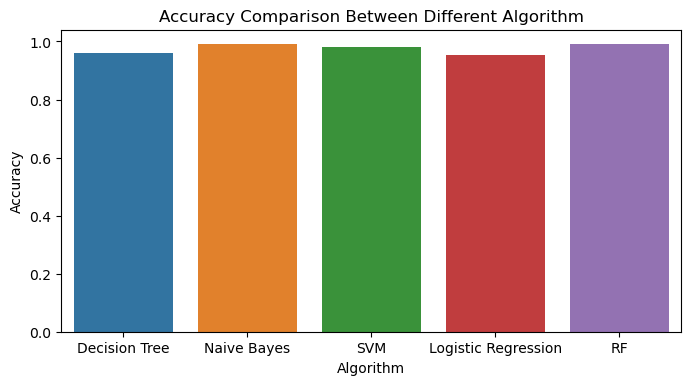

In [150]:
plt.figure(figsize=[8,4],dpi = 100)
plt.title('Accuracy Comparison Between Different Algorithm')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
sns.barplot(x=model, y=acc, data=df, orient='v')

This code block plots a bar chart that compares the accuracy of different machine learning algorithms used to predict crop labels.

plt.figure(figsize=[8,4],dpi = 100) creates a new figure object with a size of 8 by 4 inches and a DPI of 100.

plt.title('Accuracy Comparison Between Different Algorithm') sets the title of the plot.

plt.ylabel('Accuracy') sets the y-axis label.

plt.xlabel('Algorithm') sets the x-axis label.

sns.barplot(x=model, y=acc, data=df, orient='v') plots a vertical bar chart with model on the x-axis and acc on the y-axis.

In [151]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->>', v)
    
    print('================================================')

Decision Tree -->> 0.9590909090909091
Naive Bayes -->> 0.990909090909091
SVM -->> 0.9795454545454545
Logistic Regression -->> 0.9522727272727273
RF -->> 0.990909090909091


This code creates a dictionary called accuracy_models by using zip() function to combine two lists, model and acc, where model contains the names of machine learning algorithms and acc contains the corresponding accuracy scores achieved by the algorithms.

Then, the for loop is used to iterate over the items of accuracy_models. During each iteration, the algorithm name and its corresponding accuracy score are printed out.

## Making a prediction

In [152]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [153]:
data = np.array([[35, 51, 17, 28.79929247 , 49.84213387, 3.558822825, 40.85534718]])
prediction = RF.predict(data)
print(prediction)

['mothbeans']


In [154]:
data = np.array([[65, 28, 17, 25.43323 , 56.445, 6.1211, 89.0023]])
prediction = RF.predict(data)
print(prediction)

['maize']
